In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [5]:
df_numeric = pd.read_csv("train_numeric.csv")

In [4]:
df_numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df_tags = df_numeric[["Id", "Response"]]
len(df_numeric)

1183747

In [6]:
# group features into lines and stations
lines = {}
for col in df_numeric.columns[1:-1]:
    piece = [pc[1:] for pc in col.split("_")]
    
    if len(piece) != 3:
        print "Invalid column format: %s" % col
        continue
        
    if piece[0] not in lines:
        lines[piece[0]] = {}
    
    if piece[1] not in lines[piece[0]]:
        lines[piece[0]][piece[1]] = []
    
    lines[piece[0]][piece[1]].append((piece[2], col))

In [7]:
print len(lines['0'])
print sum([len(lines['0'][col]) for col in lines['0']])
print len(lines['1'])
print sum([len(lines['1'][col]) for col in lines['1']])
print len(lines['2'])
print sum([len(lines['2'][col]) for col in lines['2']])
print len(lines['3'])
print sum([len(lines['3'][col]) for col in lines['3']])

24
168
2
513
3
42
21
245


In [8]:
# analysis of line 2 data
lines['2'].keys()

['26', '27', '28']

In [19]:
df_226 = df_numeric[[tup[1] for tup in lines['2']['26']] + ['Id', 'Response']]

In [20]:
df_226.head()

,L2_S26_F3036,L2_S26_F3040,L2_S26_F3047,L2_S26_F3051,L2_S26_F3055,L2_S26_F3062,L2_S26_F3069,L2_S26_F3073,L2_S26_F3077,L2_S26_F3106,L2_S26_F3113,L2_S26_F3117,L2_S26_F3121,L2_S26_F3125,Id,Response
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0


In [11]:
# output columns with strictly NaN values
def strictly_nan(df):
    return [col for col in df.columns if df[col].isnull().all()]

In [ ]:
# create uid string column and set as index
df_226["uid"] = df_226["Id"].apply(lambda x: str(x))
df_226.drop("Id", inplace=True, axis=1)
df_226.set_index("uid", inplace=True)

In [ ]:
# remove Response so that we can correctly check isnull()
df_226.drop("Response", inplace=True, axis=1)

In [37]:
nan_226 = strictly_nan(df_226.T)

In [38]:
len(nan_226)

956736

In [39]:
df_226_cut = df_226.T[list(set(df_226.T.columns) - set(nan_226))].T

In [40]:
len(df_226_cut)

227011

In [41]:
df_226_cut.head()

,L2_S26_F3036,L2_S26_F3040,L2_S26_F3047,L2_S26_F3051,L2_S26_F3055,L2_S26_F3062,L2_S26_F3069,L2_S26_F3073,L2_S26_F3077,L2_S26_F3106,L2_S26_F3113,L2_S26_F3117,L2_S26_F3121,L2_S26_F3125
uid,,,,,,,,,,,,,,
1583071,-0.138,0.066,-0.003,-0.090,-0.031,0.033,-0.046,0.105,-0.035,-0.006,0.018,0.060,-0.075,-0.034
228055,-0.045,-0.032,-0.130,-0.004,-0.031,0.004,0.020,0.158,-0.035,0.055,-0.080,0.053,-0.011,-0.034
287146,-0.082,0.156,-0.032,0.000,-0.031,0.058,0.069,-0.090,-0.035,0.002,-0.029,-0.011,0.019,-0.034
228056,-0.045,-0.032,-0.130,-0.004,-0.031,0.004,0.020,0.158,-0.035,0.055,-0.080,0.053,-0.011,-0.034
287140,-0.211,-0.205,0.064,0.168,-0.031,-0.204,-0.125,0.050,-0.035,-0.586,0.019,-0.083,0.168,-0.034


In [16]:
from matplotlib import pyplot as plt

In [63]:
# iterate over all 15 features and generate plots
def generate_plots(df, size):
    """
        Helper function to generate a grid of plots for the
        assumed features of a dataframe. Should be used strictly
        for relative-feature inspection (i.e. how do plots for each
        feature compare to one another).
        
        Parameters
        ----------
        df : {pandas.DataFrame}
            data set consisting of features (columns) and records (row index)
        
        size : {tuple}
            grid representation; rows and columns of the grid correspond
            to index 0 and 1, respectively
    """
    numerical_ids = [int(id) for id in df.index.tolist()]
    fig = matplotlib.pyplot.figure(figsize=(20, 20), dpi=400)
    for idx, col in enumerate(df.columns):
        axes = fig.add_subplot(size[0], size[1], idx+1)
        axes.plot(zip(numerical_ids, df[col].tolist()))
    
    matplotlib.pyplot.show()

In [6]:
# only use the first three hundred thousand rows
df_numeric = df_numeric[:300000]

In [7]:
df_numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
# split data set into failures and passes
df_fail = df_numeric[df_numeric["Response"] == 0]
df_pass = df_numeric[df_numeric["Response"] == 1]

In [48]:
def feature_trends(df, response_col, figsize=(30,30), size=(3, 10), ignore=[]):
    """
        Plot feature values against response variable.
        
        Parameters
        ----------
        df : {pandas.Dataframe}
            data set
        
        response_col : {string}
            response variable in data set
        
        figsize : {tuple}
            figure size; default value acceptable for 20x3 grid
            
        size : {tuple}
            size of plot grid; defaults to 10x3 (i.e. 30 features)
        
        ignore : {list}
            list of features to ignore when plotting
    """
    fig = plt.figure(figsize=figsize, dpi=400)
    cols = df_numeric.columns[:size[0]*size[1]]
    cols = set(cols) - set(ignore)
    for idx, col in enumerate(cols):
        axes = fig.add_subplot(size[0], size[1], idx+1)
        axes.set_title(col)
        axes.scatter(df[col], df[response_col])
    plt.tight_layout()
    plt.show()

In [68]:
# obtain switch frequency for a given feature
def switch_frequency(col, resp):
    """
        Obtain the switch frequency for a given feature
        
        Parameters
        ----------
        col : {pandas.Series}
            series of feature values
        
        resp : {pandas.Series}
            response variable series
    """
    sf = 0
    data = filter(lambda x: not np.isnan(x[0]), zip(col, resp))
    prev = data[0][0]
    for val, resp in data[1:]:
        if resp == prev:
            continue
        sf += 1
        prev = resp
    return sf

In [ ]:
# create dataframe with switch frequencies
sw_freq = {}
for col in df_numeric.columns[1:-1]:
    sw_freq[col] = switch_frequency(df_numeric[col], df_numeric.Response)

In [77]:
df_sf = pd.DataFrame([sw_freq.keys(), sw_freq.values()]).T
df_sf.columns=["feature", "switch_freq"]

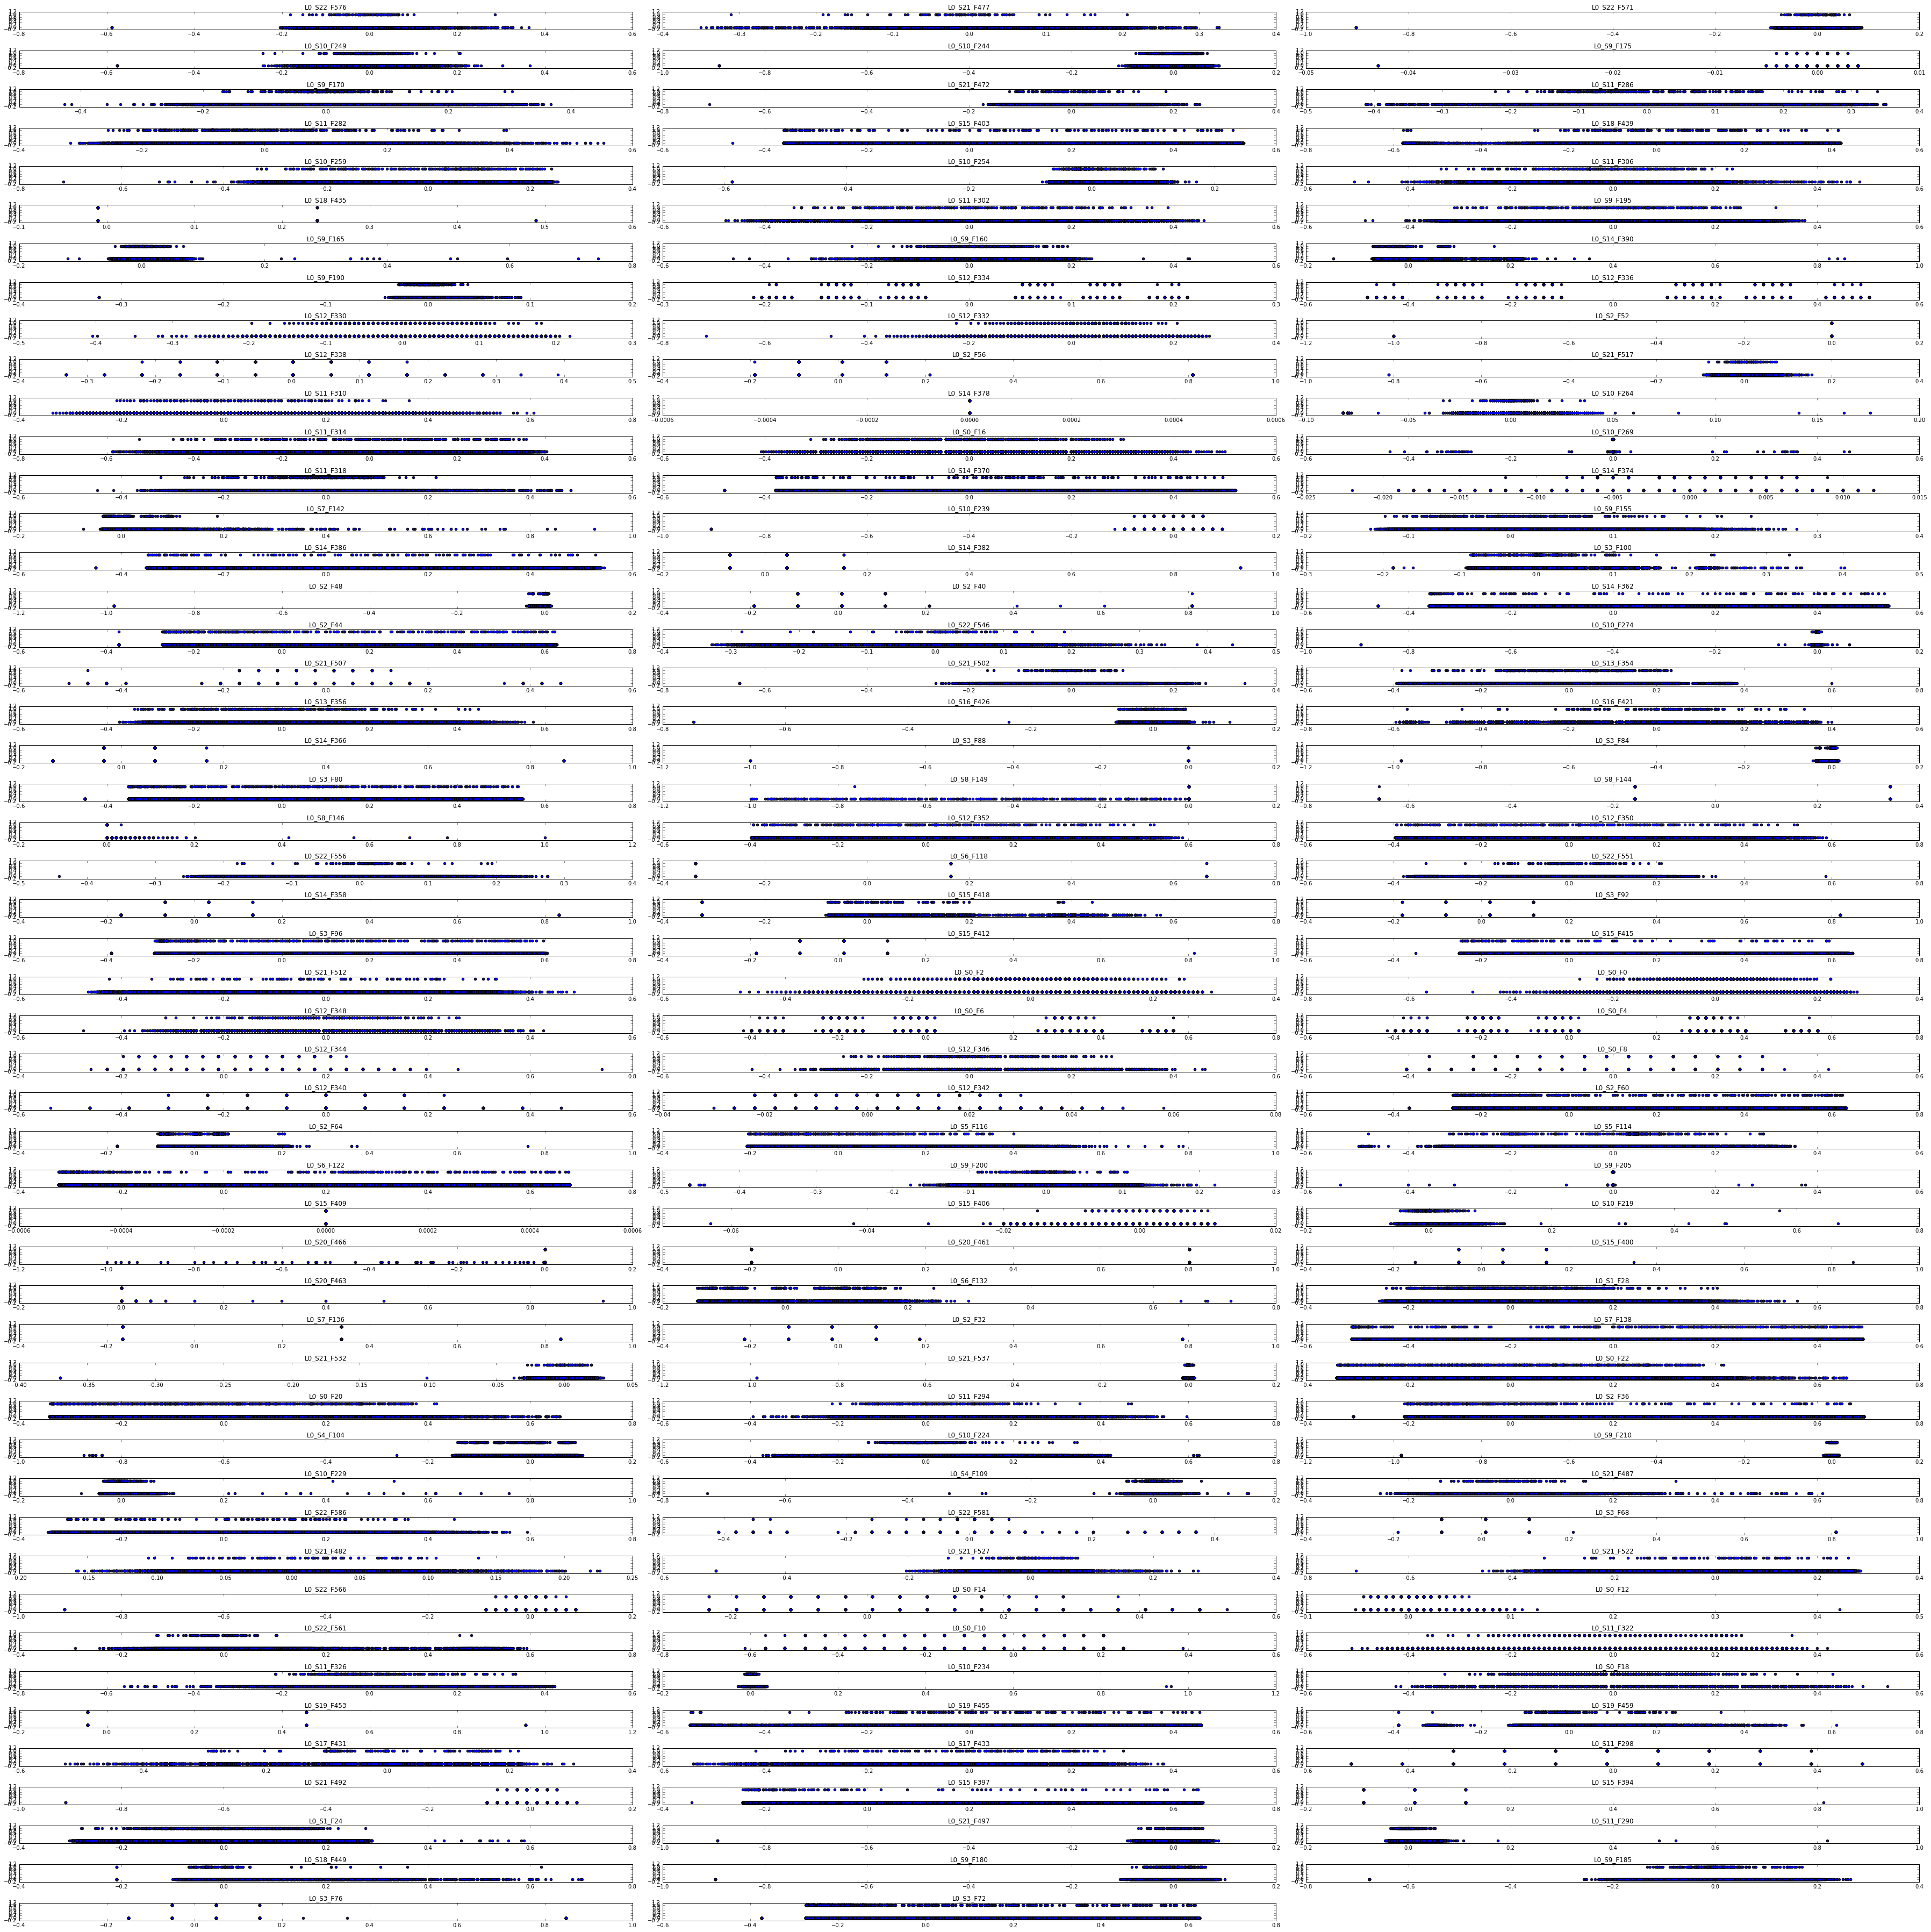

In [79]:
feature_trends(df_numeric, "Response", figsize=(50,50), size=(50,3), ignore=["Id", "Response"])

In [80]:
df_sf.head()

,feature,switch_freq
0,L2_S27_F3162,331
1,L3_S47_F4168,151
2,L1_S24_F1260,25
3,L1_S24_F1265,25
4,L3_S41_F4002,150


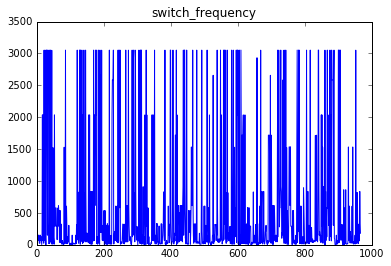

In [81]:
fig2 = plt.figure()
axes = fig2.add_subplot(1,1,1)
axes.set_title("switch_frequency")
axes.plot(df_sf["switch_freq"])
plt.show()